In [1]:
import pandas as pd
import numpy as np
import itertools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import sem, t
from statsmodels.stats import weightstats as stests

df = pd.read_csv('movies.csv')

In [2]:
#keeping only the necessary columns
df = df[['Title', 'Worldwide Gross', 'Production Budget', 'Release Date', 'Major Genre', 'Director', 'Rotten Tomatoes Rating', 'IMDB Rating', 'IMDB Votes']]
#renaming some columns
df.rename(columns = {'Worldwide Gross' : 'Gross', 'Production Budget' : 'Budget', 'Release Date' : 'Date', 'Major Genre' : 'Genre', 'Rotten Tomatoes Rating' : 'RTRating', 'IMDB Rating' : 'IMDBRating', 'IMDB Votes' : 'IMDBVotes'}, inplace = True)

In [3]:
#cropping unnecessary info from Date
df.Date = df['Date'].str.rstrip()
df.Date = df['Date'].str[-2:]

In [4]:
#pruning unwanted rows from Date
df = df[df['Date'].str.isdecimal() == True]

#pruning unwanted rows from Gross
df = df[df['Gross'] != 'Unknown']

In [5]:
#fixing indices after pruning (starting from 1 instead of 0)
df.index = np.arange(1, len(df) + 1)

In [6]:
#fixing Date format
df.Date = pd.to_numeric(df['Date'], errors = 'coerce')
df.Date = df['Date'].map("{:02}".format)
df.Date = df['Date'].apply(lambda x:'20'+x if 0 <= int(x) <= 19 else '19'+x)
df.Date = df['Date'].astype(int)

In [7]:
#converting Gross from str to float
df.Gross = df['Gross'].astype(float)

In [8]:
#fixing scale climax on RTRating
df.RTRating = df['RTRating'].apply(lambda x: x/10)

In [9]:
#making a genres Dataframe splitting the one column to two (Columns: ID, First, Second)
#helpful 
genres_df = df['Genre'].dropna()
genres_df = genres_df.str.split('/', expand = True)
genres_df.columns = ['First', 'Second']

second_genre_df = genres_df['Second'].dropna()
print(genres_df)

          First    Second
2         Drama      None
3        Comedy      None
4        Comedy      None
5         Drama      None
8        Comedy      None
...         ...       ...
3183     Comedy      None
3184   Thriller  Suspense
3185  Adventure      None
3186  Adventure      None
3187  Adventure      None

[2925 rows x 2 columns]


In [10]:
#constructing a dictionary for Genre (key = genre : value = number of movies)
genres_hash = {}

for i in genres_df['First']:

    if i not in genres_hash:

        genres_hash[i] = 1

    else:

        genres_hash[i] += 1


for i in second_genre_df:

    if i not in genres_hash:

        genres_hash[i] = 1

    else:

        genres_hash[i] += 1

In [11]:
#making the Genre Number Dataframe so as to make the bar plot later
genre_numbers_df = pd.DataFrame.from_dict(genres_hash, orient = 'index')
genre_numbers_df.columns = ['Number of Movies']
genre_numbers_df.insert(0, 'Genre', genres_hash.keys())
genre_numbers_df.sort_values('Number of Movies', ascending = False, inplace = True)
genre_numbers_df.reset_index()
genre_numbers_df.index = range(len(genre_numbers_df))
print(genre_numbers_df)

              Genre  Number of Movies
0             Drama               789
1            Comedy               674
2            Action               420
3         Adventure               274
4          Thriller               239
5          Suspense               239
6            Horror               219
7   Romantic Comedy               137
8           Musical                53
9       Documentary                43
10          Western                36
11     Black Comedy                36
12          Concert                 5
13      Performance                 5


In [12]:
#to csv
df.to_csv('cleandata_movies.csv', index_label = 'ID')
print(df)

                           Title        Gross      Budget  Date  \
1                 The Land Girls     146083.0   8000000.0  1998   
2         First Love, Last Rites      10876.0    300000.0  1998   
3     I Married a Strange Person     203134.0    250000.0  1998   
4           Let's Talk About Sex     373615.0    300000.0  1998   
5                           Slam    1087521.0   1000000.0  1998   
...                          ...          ...         ...   ...   
3183  Zack and Miri Make a Porno   36851125.0  24000000.0  2008   
3184                      Zodiac   83080084.0  85000000.0  2007   
3185                        Zoom   12506188.0  35000000.0  2006   
3186         The Legend of Zorro  141475336.0  80000000.0  2005   
3187           The Mask of Zorro  233700000.0  65000000.0  1998   

                  Genre         Director  RTRating  IMDBRating  IMDBVotes  
1                   NaN              NaN       NaN         6.1     1071.0  
2                 Drama              NaN   

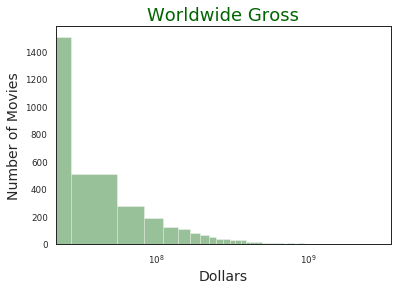

In [13]:
#making Worldwide Gross histogram
sns.set_context('paper')
sns.set_style('white')

gross = df['Gross']

sns.distplot( gross, kde = False, color = 'darkgreen', bins = 100)
plt.xscale('log')
plt.title('Worldwide Gross', color = 'darkgreen', fontsize = 18)
plt.xlabel('Dollars', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)

plt.savefig('WorldwideGross_Histogram.png')

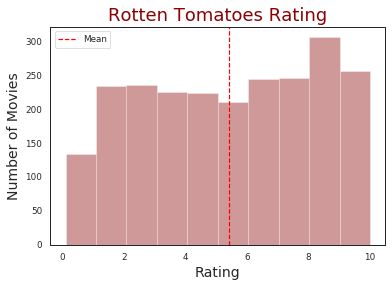

In [14]:
#making Rotten Tomatoes Rating histogram
rtr = df['RTRating'].dropna()

sns.distplot(rtr, kde = False, color='darkred', bins = 10)
plt.title('Rotten Tomatoes Rating',color = 'darkred', fontsize = 18)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)

mean = rtr.mean()
plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})

plt.savefig('RottenTomatoesRating_Histogram.png')

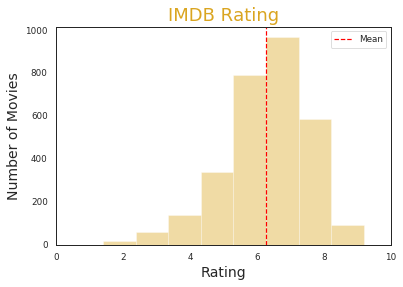

In [15]:
#making IMDB Rating histogram
imdbr = df['IMDBRating'].dropna()

sns.distplot(imdbr, kde = False, color='goldenrod', bins = 8)

plt.xlim(0, 10)
plt.title('IMDB Rating',color = 'goldenrod', fontsize = 18)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Number of Movies', fontsize=14)

mean = imdbr.mean()
plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})

plt.savefig('IMDBRating_Histogram.png')

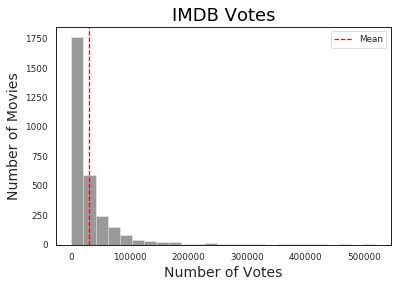

In [16]:
#making IMDB Votes histogram
imdbv = df['IMDBVotes'].dropna()

sns.distplot(imdbv, kde = False, color = 'black', bins = 25)
plt.title('IMDB Votes',color = 'black', fontsize = 18)
plt.xlabel('Number of Votes', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)

mean = imdbv.mean()
plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})

plt.savefig('IMDBVotes_Histogram.png')

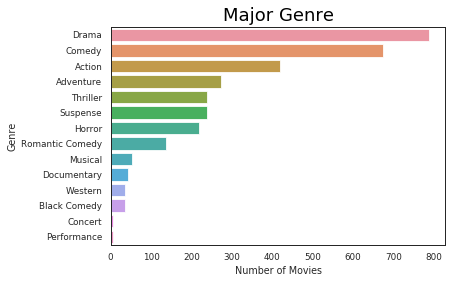

In [17]:
#making Genres bar plot
sns.barplot(x = 'Number of Movies', y = 'Genre', data = genre_numbers_df)
plt.title('Major Genre', color = 'black', fontsize = 18)

plt.savefig('num_movie_genre_barplot.png')

In [18]:
#merging Gross with IMDBVotes into one DataFrame
gross_votes_df = pd.merge(pd.DataFrame(gross), pd.DataFrame(imdbv), left_index = True, right_index = True)
print(gross_votes_df)

            Gross  IMDBVotes
1        146083.0     1071.0
2         10876.0      207.0
3        203134.0      865.0
5       1087521.0      165.0
7         44705.0    15133.0
...           ...        ...
3182   98690286.0    81629.0
3183   36851125.0    55687.0
3185   12506188.0     7424.0
3186  141475336.0    21161.0
3187  233700000.0     4789.0

[2981 rows x 2 columns]


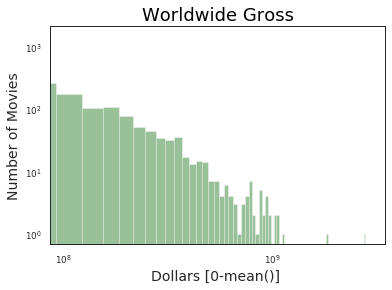

In [19]:
m = gross_votes_df['Gross'].mean()

sns.distplot(gross_votes_df['Gross'], kde = False, color = 'darkgreen', label = 'Gross', bins = 90)

plt.xscale('log')
plt.yscale('log')
plt.xlim(m)
#.mean(skipna = True)

plt.title('Worldwide Gross',color = 'black', fontsize = 18)
plt.xlabel('Dollars [0-mean()] ', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)

plt.savefig('Grosslog_Histogram.png')

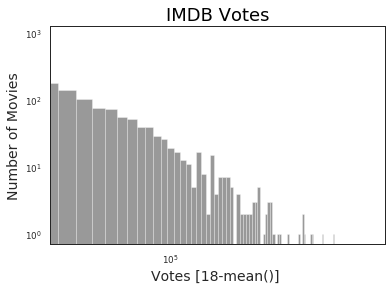

In [20]:
m = gross_votes_df['IMDBVotes'].mean()
sns.distplot(gross_votes_df['IMDBVotes'] , kde = False, color = 'black', label = 'IMDBVotes', bins = 80)

plt.xscale('log')
plt.yscale('log')
plt.xlim(m)

plt.title('IMDB Votes',color = 'black', fontsize = 18)
plt.xlabel('Votes [18-mean()] ', fontsize = 14)
plt.ylabel('Number of Movies', fontsize = 14)

plt.savefig('Voteslog_Histogram.png')

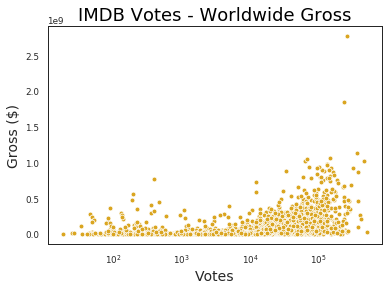

In [21]:
#making Worldwide Gross and IMDB Votes Scatterplot
sns.scatterplot(x = 'IMDBVotes', y = 'Gross', data = gross_votes_df, facecolor = 'goldenrod' )

plt.xscale('log')
plt.title('IMDB Votes - Worldwide Gross',color = 'black', fontsize = 18)
plt.xlabel('Votes', fontsize = 14)
plt.ylabel('Gross ($)', fontsize = 14)

plt.savefig('VotesGross_Scatterplot.png')

In [22]:
#Pearson Correlation Coefficient: Worldwide Gross and IMDB Votes
gross_votes_df.corr(method = 'pearson')

,Gross,IMDBVotes
Gross,1.000000,0.551452
IMDBVotes,0.551452,1.000000


In [23]:
#Spearman Correlation Coefficient: Worldwide Gross and IMDB Votes
gross_votes_df.corr(method = 'spearman')

,Gross,IMDBVotes
Gross,1.000000,0.655319
IMDBVotes,0.655319,1.000000


In [24]:
#2 sample z-test: Worldwide Gross and IMDB Votes
print('H0: People vote movies with high gross\n ')
print('H1:People vote movies no matter their gross\n')
ztest, pval = stests.ztest(gross_votes_df['Gross'], x2 = gross_votes_df['IMDBVotes'], value = gross_votes_df['Gross'].mean(), alternative = 'two-sided')
print('p-value: ', pval)

if pval<0.05:
    
    print('\nReject Null Hypothesis (H0)')

else:
    
    print('\nAccept Null Hypothesis (H0)')

H0: People vote movies with high gross
 
H1:People vote movies no matter their gross

p-value:  0.9912672259671249

Accept Null Hypothesis (H0)


In [25]:
#concatenating RTRating with IMDBRating into one DataFrame
rtr_imdbr_df = pd.concat([pd.DataFrame(rtr), pd.DataFrame(imdbr)], axis =1)
rtr_imdbr_df.dropna(inplace=True)
print(rtr_imdbr_df)

      RTRating  IMDBRating
5          6.2         3.4
9          2.5         5.8
10         8.6         7.0
11         8.1         7.0
12         8.4         7.5
...        ...         ...
3182       8.9         7.8
3183       6.5         7.0
3185       0.3         3.4
3186       2.6         5.7
3187       8.2         6.7

[2256 rows x 2 columns]


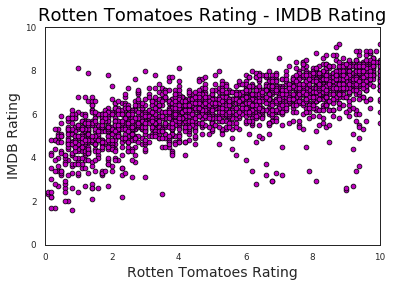

In [26]:
#making RTRating and IMDBRating Scatterplot
sns.scatterplot(x = 'RTRating', y='IMDBRating', data = rtr_imdbr_df, facecolor = 'm', edgecolor = 'black')

plt.title('Rotten Tomatoes Rating - IMDB Rating',color = 'black', fontsize = 18)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Rotten Tomatoes Rating', fontsize = 14)
plt.ylabel('IMDB Rating', fontsize = 14)

plt.savefig('RTR_IMDB_Ratings_Scatterplot.png')

In [27]:
#Pearson Correlation Coefficient: RTRating and IMDBRating
rtr_imdbr_df.corr(method = 'pearson')

,RTRating,IMDBRating
RTRating,1.000000,0.742951
IMDBRating,0.742951,1.000000


In [28]:
#Spearman Correlation Coefficient: RTRating and IMDBRating
rtr_imdbr_df.corr(method = 'spearman')

,RTRating,IMDBRating
RTRating,1.000000,0.776429
IMDBRating,0.776429,1.000000


In [29]:
#2 sample z-test:  RTRating and IMDBRating
print('H0: The way people vote in Rotten Tomatoes and IMDB has a non-linear correlation.\n ')
print('H1: The way people vote in Rotten Tomatoes and IMDB has a linear correlation.\n')

ztest, pval = stests.ztest(rtr_imdbr_df['RTRating'], x2 = rtr_imdbr_df['IMDBRating'], value = rtr_imdbr_df['RTRating'].mean() , alternative = 'two-sided')
print('p-value: ', pval)

if pval<0.05:
    
    print('\nReject Null Hypothesis (H0)')

else:
    
    print('\nAccept Null Hypothesis (H0)')

H0: The way people vote in Rotten Tomatoes and IMDB has a non-linear correlation.
 
H1: The way people vote in Rotten Tomatoes and IMDB has a linear correlation.

p-value:  0.0

Reject Null Hypothesis (H0)


In [30]:
#merging Gross with Genres into one DataFrame
gross_genre_df = df[['Gross']]
gross_genre_df['Genre1'] = genres_df['First']
gross_genre_df.dropna(inplace = True)
gross_genre_df['Genre2'] = genres_df['Second']
gross_genre_df = gross_genre_df.replace(np.nan, ' ', regex=True)
print(gross_genre_df)

        

            Gross     Genre1    Genre2
2         10876.0      Drama          
3        203134.0     Comedy          
4        373615.0     Comedy          
5       1087521.0      Drama          
8       6026908.0     Comedy          
...           ...        ...       ...
3183   36851125.0     Comedy          
3184   83080084.0   Thriller  Suspense
3185   12506188.0  Adventure          
3186  141475336.0  Adventure          
3187  233700000.0  Adventure          

[2925 rows x 3 columns]


/home/joanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/joanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/joanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [31]:
a = {'dram':[1,2], 'hot': [3,5]}
x = list(a.get('dram'))[1]
#x = x[0][1]
print(x)

2


In [32]:
#creating a dictionary for Genre: total Gross per genre

gross_hash ={}

gross_list = gross_genre_df['Gross'].values
genre1_list = gross_genre_df['Genre1'].values
genre2_list = gross_genre_df['Genre2'].values

for g in range(len(gross_list)):

    
    if genre1_list[g] != ' ':
    
        if genre1_list[g] not in gross_hash:
            
            
            gross_hash[genre1_list[g]] = [gross_list[g], 1]

           

        else:
            
            gross_sum = float(list(gross_hash.get(genre1_list[g]))[0]) + gross_list[g]
            counter_movies = int(list(gross_hash.get(genre1_list[g]))[1]) + 1
            
            gross_hash[genre1_list[g]] = [gross_sum, counter_movies]

            
            
    if genre2_list[g] != ' ':
        
        if genre2_list[g] not in gross_hash:

            gross_hash[genre2_list[g]] = [gross_list[g], 1 ]
          

        else:
            
            gross_sum = float(list(gross_hash.get(genre2_list[g]))[0]) + gross_list[g]
            counter_movies = int(list(gross_hash.get(genre2_list[g]))[1]) + 1
                                  
            gross_hash[genre2_list[g]] = [gross_sum, counter_movies]




print(gross_hash)

{'Drama': [40476168953.0, 789], 'Comedy': [50384049282.0, 674], 'Musical': [3904838498.0, 53], 'Thriller': [19260687079.0, 239], 'Suspense': [19260687079.0, 239], 'Adventure': [66080959632.0, 274], 'Action': [60435609765.0, 420], 'Romantic Comedy': [11866645522.0, 137], 'Horror': [13321678769.0, 219], 'Western': [1301373151.0, 36], 'Documentary': [698944401.0, 43], 'Black Comedy': [824671927.0, 36], 'Concert': [153622009.0, 5], 'Performance': [153622009.0, 5]}
